# Louisville Metro Liquor Licenses

In [3]:
# import needed packages
import csv
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read raw data CSV into ABC_data_table in ABC.db
pd.read_csv('ABCLicenseData.csv', header=0, nrows=None, chunksize=None, index_col=0, na_values=['n/a']).to_sql('ABC_data_table', sqlite3.connect("ABC.db"), if_exists = "replace")

In [5]:
con = sqlite3.connect("ABC.db")
#display all columns
pd.options.display.max_columns = 500
#use sql query to read database table into pandas dataframe object, ommitting null IssueDate's and DISTRICT's
data_df = pd.read_sql_query("SELECT * FROM ABC_data_table WHERE IssueDate IS NOT NULL AND DISTRICT IS NOT NULL" , con, parse_dates=True,)
#parse year from datatime field
data_df['IssueDate'] = pd.to_datetime(data_df['IssueDate'])
#convert year and district to int datatype
data_df['Year'] = data_df['IssueDate'].dt.year.astype('int')
data_df['DISTRICT'] = data_df['DISTRICT'].astype('int')
#read cleaned up data back into database table
data_df.to_sql('ABC_data_table', con, schema=None, if_exists='replace', index=False, index_label=None)
#display first five records for review
data_df.head()

,CodesAndRegsLicenseDataID,LicenseID,Description,LicenseName,Location,StreetNumber,Prefix,StreetName,Suffix,Longitude,Latitude,ExpirationDate,SubType,SubDescription,IssueDate,Zip,DISTRICT,NEIGHBORHOOD,ZONING,EndorsementType,EndorsementTypeDescription,EndorsementStatusDescription,EndorsementIssuedDate,AGENCY,GPSX,GPSY,Year
0,1,5677,Alcoholic Beverage Annual,TUMBLEWEED SOUTHWEST GRILL,4255 OUTER LOOP,4255,,OUTER,LOOP,-85.682816,38.138772,2018-08-31 00:00:00,RST,Restaurant / Cafe,2004-08-17 10:14:00,40219,24,None,C1,RLD,NQ2 Retail Drink (Restaurant),ACTIVE,None,Codes and Regulations,1228336.0,235821.0,2004
1,2,5677,Alcoholic Beverage Annual,TUMBLEWEED SOUTHWEST GRILL,4255 OUTER LOOP,4255,,OUTER,LOOP,-85.682816,38.138772,2018-08-31 00:00:00,RST,Restaurant / Cafe,2004-08-17 10:14:00,40219,24,None,C1,SD,Sunday Drink,ACTIVE,None,Codes and Regulations,1228336.0,235821.0,2004
2,3,5679,Alcoholic Beverage Annual,TUMBLEWEED SOUTHWEST GRILL,3550 SPRINGHURST COMMONS DR,3550,,SPRINGHURST COMMONS,DR,-85.561421,38.297505,2018-08-31 00:00:00,RST,Restaurant / Cafe,2004-08-03 16:22:00,40241,17,None,C1,RLD,NQ2 Retail Drink (Restaurant),ACTIVE,None,Codes and Regulations,1264070.0,293100.0,2004
3,4,5679,Alcoholic Beverage Annual,TUMBLEWEED SOUTHWEST GRILL,3550 SPRINGHURST COMMONS DR,3550,,SPRINGHURST COMMONS,DR,-85.561421,38.297505,2018-08-31 00:00:00,RST,Restaurant / Cafe,2004-08-03 16:22:00,40241,17,None,C1,SD,Sunday Drink,ACTIVE,None,Codes and Regulations,1264070.0,293100.0,2004
4,5,4642,Alcoholic Beverage Annual,CARDINAL HALL OF FAME CAFE,2745 CRITTENDEN DR,2745,,CRITTENDEN,DR,-85.748965,38.203738,2019-05-31 00:00:00,RST,Restaurant / Cafe,2004-05-25 08:47:00,40209,15,FAIRGROUNDS,M2,SBL,Supplemental Bar,ACTIVE,None,Codes and Regulations,1209698.0,259779.0,2004


In [6]:
con = sqlite3.connect("ABC.db")
pd.options.display.max_columns = 500

#create hist_df and read district column into df using sql
hist_df = pd.read_sql_query('''
SELECT DISTRICT as District
FROM ABC_data_table
GROUP BY DISTRICT
''', con)

#read 2012 through 2017 issuances grouped by district into columns using sql
hist_df['2012 Total'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year = 2012
GROUP BY DISTRICT
''', con)

hist_df['2013 Total'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year = 2013
GROUP BY DISTRICT
''', con)

hist_df['2014 Total'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year = 2014
GROUP BY DISTRICT
''', con)

hist_df['2015 Total'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year = 2015
GROUP BY DISTRICT
''', con)

hist_df['2016 Total'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year = 2016
GROUP BY DISTRICT
''', con)

hist_df['2017 Total'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year = 2017
GROUP BY DISTRICT
''', con)

#calculate 2012-2016 average issuances per year
hist_df['2012-2016 Average'] = pd.read_sql_query('''
SELECT COUNT(LicenseName)
FROM ABC_data_table
WHERE Year BETWEEN 2012 AND 2016
GROUP BY DISTRICT
''', con)/5

#For years where no licenses were issued, fill NaN with 0 
hist_df.fillna(value=0, inplace=True)

#calculate % increase of 2017 issuances over 2012-2016 average
hist_df['2017 % Inc over Avg'] = (hist_df['2017 Total']-hist_df['2012-2016 Average'])/hist_df['2012-2016 Average']*100

display(hist_df)

,District,2012 Total,2013 Total,2014 Total,2015 Total,2016 Total,2017 Total,2012-2016 Average,2017 % Inc over Avg
0,1,3.0,1.0,2.0,7.0,3.0,34,2.6,1207.692308
1,2,2.0,7.0,11.0,5.0,9.0,25,5.6,346.428571
2,3,7.0,2.0,1.0,6.0,68.0,46,5.0,820.000000
3,4,36.0,43.0,62.0,78.0,4.0,193,57.4,236.236934
4,5,2.0,14.0,11.0,12.0,34.0,58,5.8,900.000000
5,6,14.0,3.0,10.0,26.0,14.0,83,19.6,323.469388
6,7,16.0,20.0,11.0,5.0,30.0,10,6.6,51.515152
7,8,8.0,6.0,32.0,43.0,21.0,66,28.2,134.042553
8,9,8.0,2.0,11.0,23.0,33.0,78,13.8,465.217391
9,10,3.0,3.0,40.0,17.0,1.0,71,20.0,255.000000


Text(0.5,1,'License Heatmap')

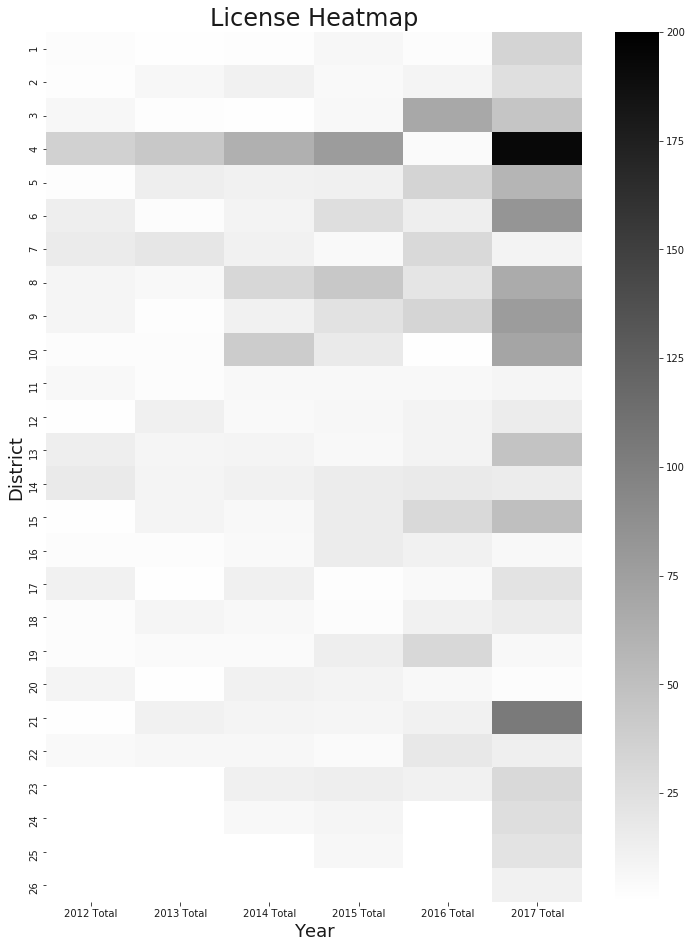

In [11]:
#create heat_df from hist_df dropping 2012-2016 Average and 2017 % Inc over Avg columns
heat_df = hist_df.drop(columns=['2012-2016 Average','2017 % Inc over Avg'])

#set index to district
heat_df = heat_df.set_index('District')

#set plot size
plt.figure(figsize=(12,16))

#use seaborn to create heatmap from heat_df
sns.heatmap(heat_df, cmap="gist_yarg", vmax=200, cbar_kws=dict(ticks=[25, 50, 75, 100, 125, 150, 175, 200]))
plt.xlabel('Year', fontsize=18)
plt.ylabel('District', fontsize=18)
plt.title("License Heatmap", fontsize=24)

Text(0.5,1,'2017 Total Licenses vs 2012-2016 Average')

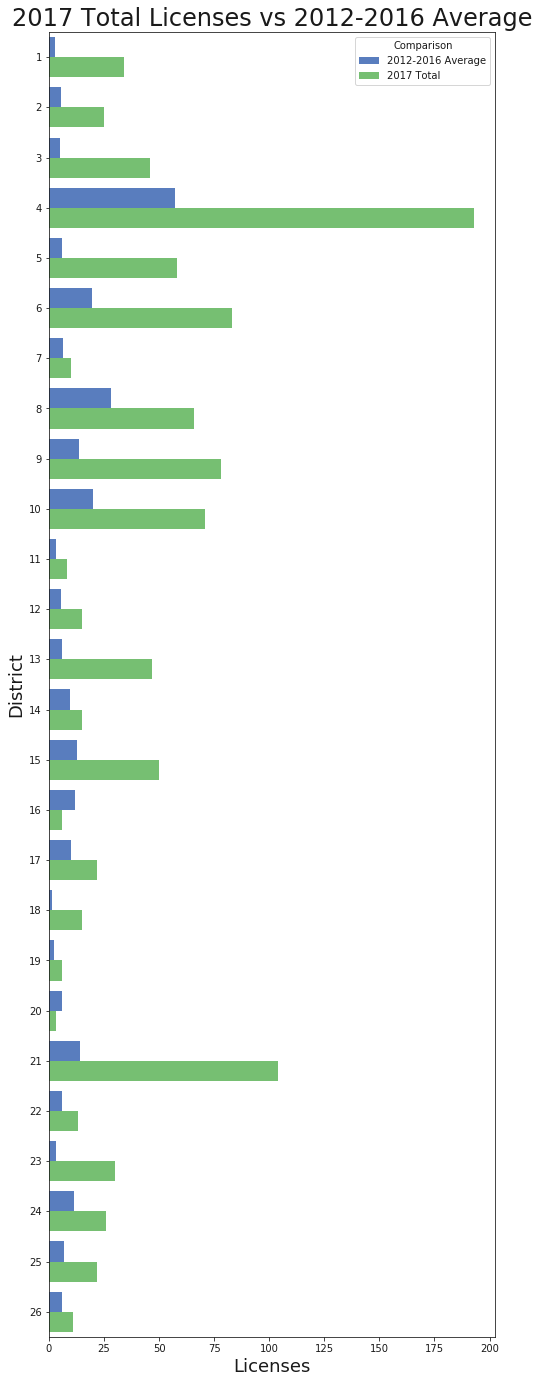

In [10]:
hbar_df = hist_df

hbar_df = pd.melt(hbar_df, id_vars='District', value_vars=["2012-2016 Average", "2017 Total"], value_name="Licenses", var_name="Comparison")

# Plot that data using seaborn


plt.figure(figsize=(8,24))
sns.set_color_codes("pastel")
sns.barplot(x='Licenses', y='District', hue='Comparison', palette='muted', data=hbar_df, orient = "h")
plt.xlabel('Licenses', fontsize=18)
plt.ylabel('District', fontsize=18)
plt.title("2017 Total Licenses vs 2012-2016 Average", fontsize=24)


Text(0.5,1,'Top and Bottom 5 Districts by % Increase in Licences')

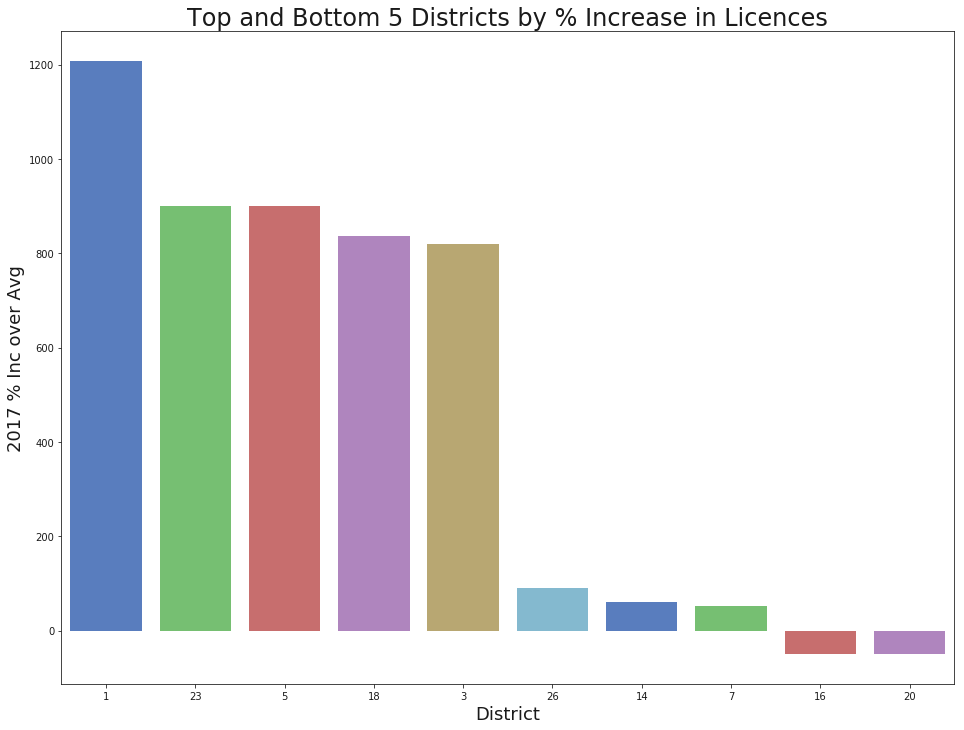

In [20]:
vbar_df = hist_df

vbar_df = pd.melt(vbar_df, id_vars='District', value_vars=["2017 % Inc over Avg"], value_name="Licenses", var_name="2017 % Inc over Avg")
vbar_df = vbar_df.sort_values(by=['Licenses'])
# Plot that data using seaborn
plt.figure(figsize=(16,12))
sns.set_color_codes("pastel")
sns.barplot(x='District', y='Licenses', palette='muted', data=vbar_df,
           order=[1,23,5,18,3,26,14,7,16,20])
plt.xlabel('District', fontsize=18)
plt.ylabel('2017 % Inc over Avg', fontsize=18)
plt.title("Top and Bottom 5 Districts by % Increase in Licences", fontsize=24)
#display(vbar_df)